# Breast Cancer Prediction
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area. The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign (non cancerous).

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Dataset Details

In [2]:
#importing data
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#size of dataset
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#summarizing data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
#count malignent and bengin
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\Mariam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

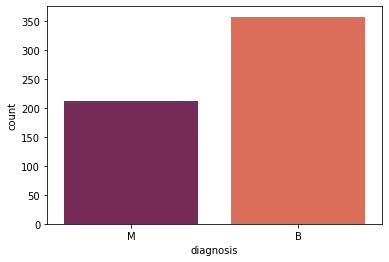

In [7]:
#plot for count of malignant and bengin
sns.countplot(data['diagnosis'], palette='rocket')

#### Clean and Prepare The Data

In [8]:
#check presence of null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

there are no missing values in the dataset


In [9]:
#dropping unnecessary column
data = data.drop('id', 1)
data.head()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_9040\3629299610.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('id', 1)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#remove duplicate rows
data = data.drop_duplicates()
data.shape

(569, 31)

there are no duplicates

In [11]:
#replace zeros with mean values
#data.replace(0,data.mean(axis=0),inplace=True)

In [12]:
#map diagnosis as binary attribute
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#remove outliers using z score
data = data[(np.abs(sc.stats.zscore(data)) < 3).all(axis=1)]

Rows narrowed down from 569 to 495 rows

In [14]:
#finding the correlation matrix
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741254,0.407111,0.754245,0.745664,0.304018,0.602065,0.752845,0.790748,0.293594,...,0.795813,0.443358,0.801401,0.785407,0.387885,0.583941,0.688232,0.779945,0.383165,0.316421
radius_mean,0.741254,1.000000,0.303868,0.998347,0.992124,0.105271,0.529787,0.725085,0.816742,0.127734,...,0.972976,0.281921,0.967128,0.953473,0.084623,0.458968,0.603564,0.752516,0.176453,0.043659
texture_mean,0.407111,0.303868,1.000000,0.309929,0.309598,-0.022729,0.239106,0.319993,0.281939,0.071375,...,0.332738,0.908867,0.341368,0.331967,0.079620,0.259470,0.303768,0.277020,0.098382,0.111614
perimeter_mean,0.754245,0.998347,0.309929,1.000000,0.990969,0.138133,0.573963,0.757549,0.841477,0.153934,...,0.974861,0.288575,0.973101,0.955845,0.113952,0.497411,0.635056,0.776930,0.196081,0.082954
area_mean,0.745664,0.992124,0.309598,0.990969,1.000000,0.107853,0.522228,0.732061,0.821292,0.134208,...,0.972647,0.283500,0.966550,0.968340,0.094481,0.443513,0.597134,0.742652,0.170612,0.045649
smoothness_mean,0.304018,0.105271,-0.022729,0.138133,0.107853,1.000000,0.632260,0.464609,0.508513,0.516732,...,0.161530,0.027220,0.178895,0.162405,0.793997,0.403701,0.366044,0.446014,0.331749,0.458146
compactness_mean,0.602065,0.529787,0.239106,0.573963,0.522228,0.632260,1.000000,0.867824,0.825167,0.513492,...,0.572608,0.243389,0.617707,0.557655,0.554556,0.868952,0.809259,0.811269,0.448738,0.666189
concavity_mean,0.752845,0.725085,0.319993,0.757549,0.732061,0.464609,0.867824,1.000000,0.938791,0.402377,...,0.754977,0.324770,0.785025,0.751669,0.442173,0.766314,0.897846,0.876544,0.360952,0.484811
concave points_mean,0.790748,0.816742,0.281939,0.841477,0.821292,0.508513,0.825167,0.938791,1.000000,0.399854,...,0.838559,0.285380,0.856292,0.831541,0.436275,0.673878,0.781777,0.910072,0.342620,0.362809
symmetry_mean,0.293594,0.127734,0.071375,0.153934,0.134208,0.516732,0.513492,0.402377,0.399854,1.000000,...,0.167598,0.079910,0.186893,0.168757,0.389893,0.380871,0.325854,0.345336,0.660621,0.342942


<AxesSubplot:>

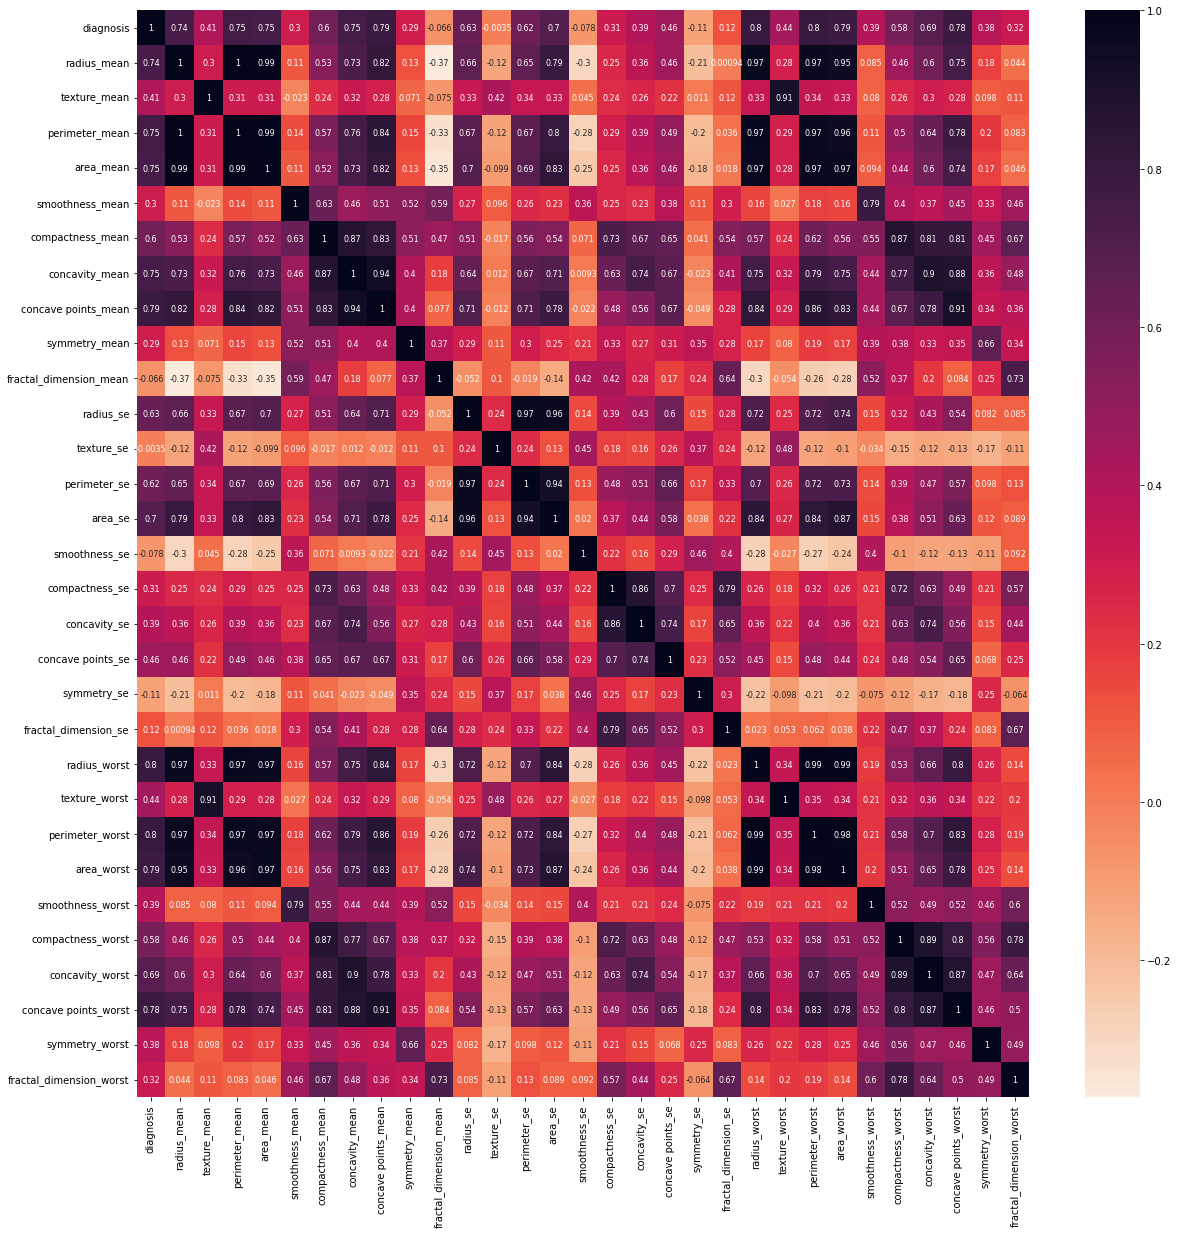

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap="rocket_r" , annot=True,annot_kws= {"size": 8})

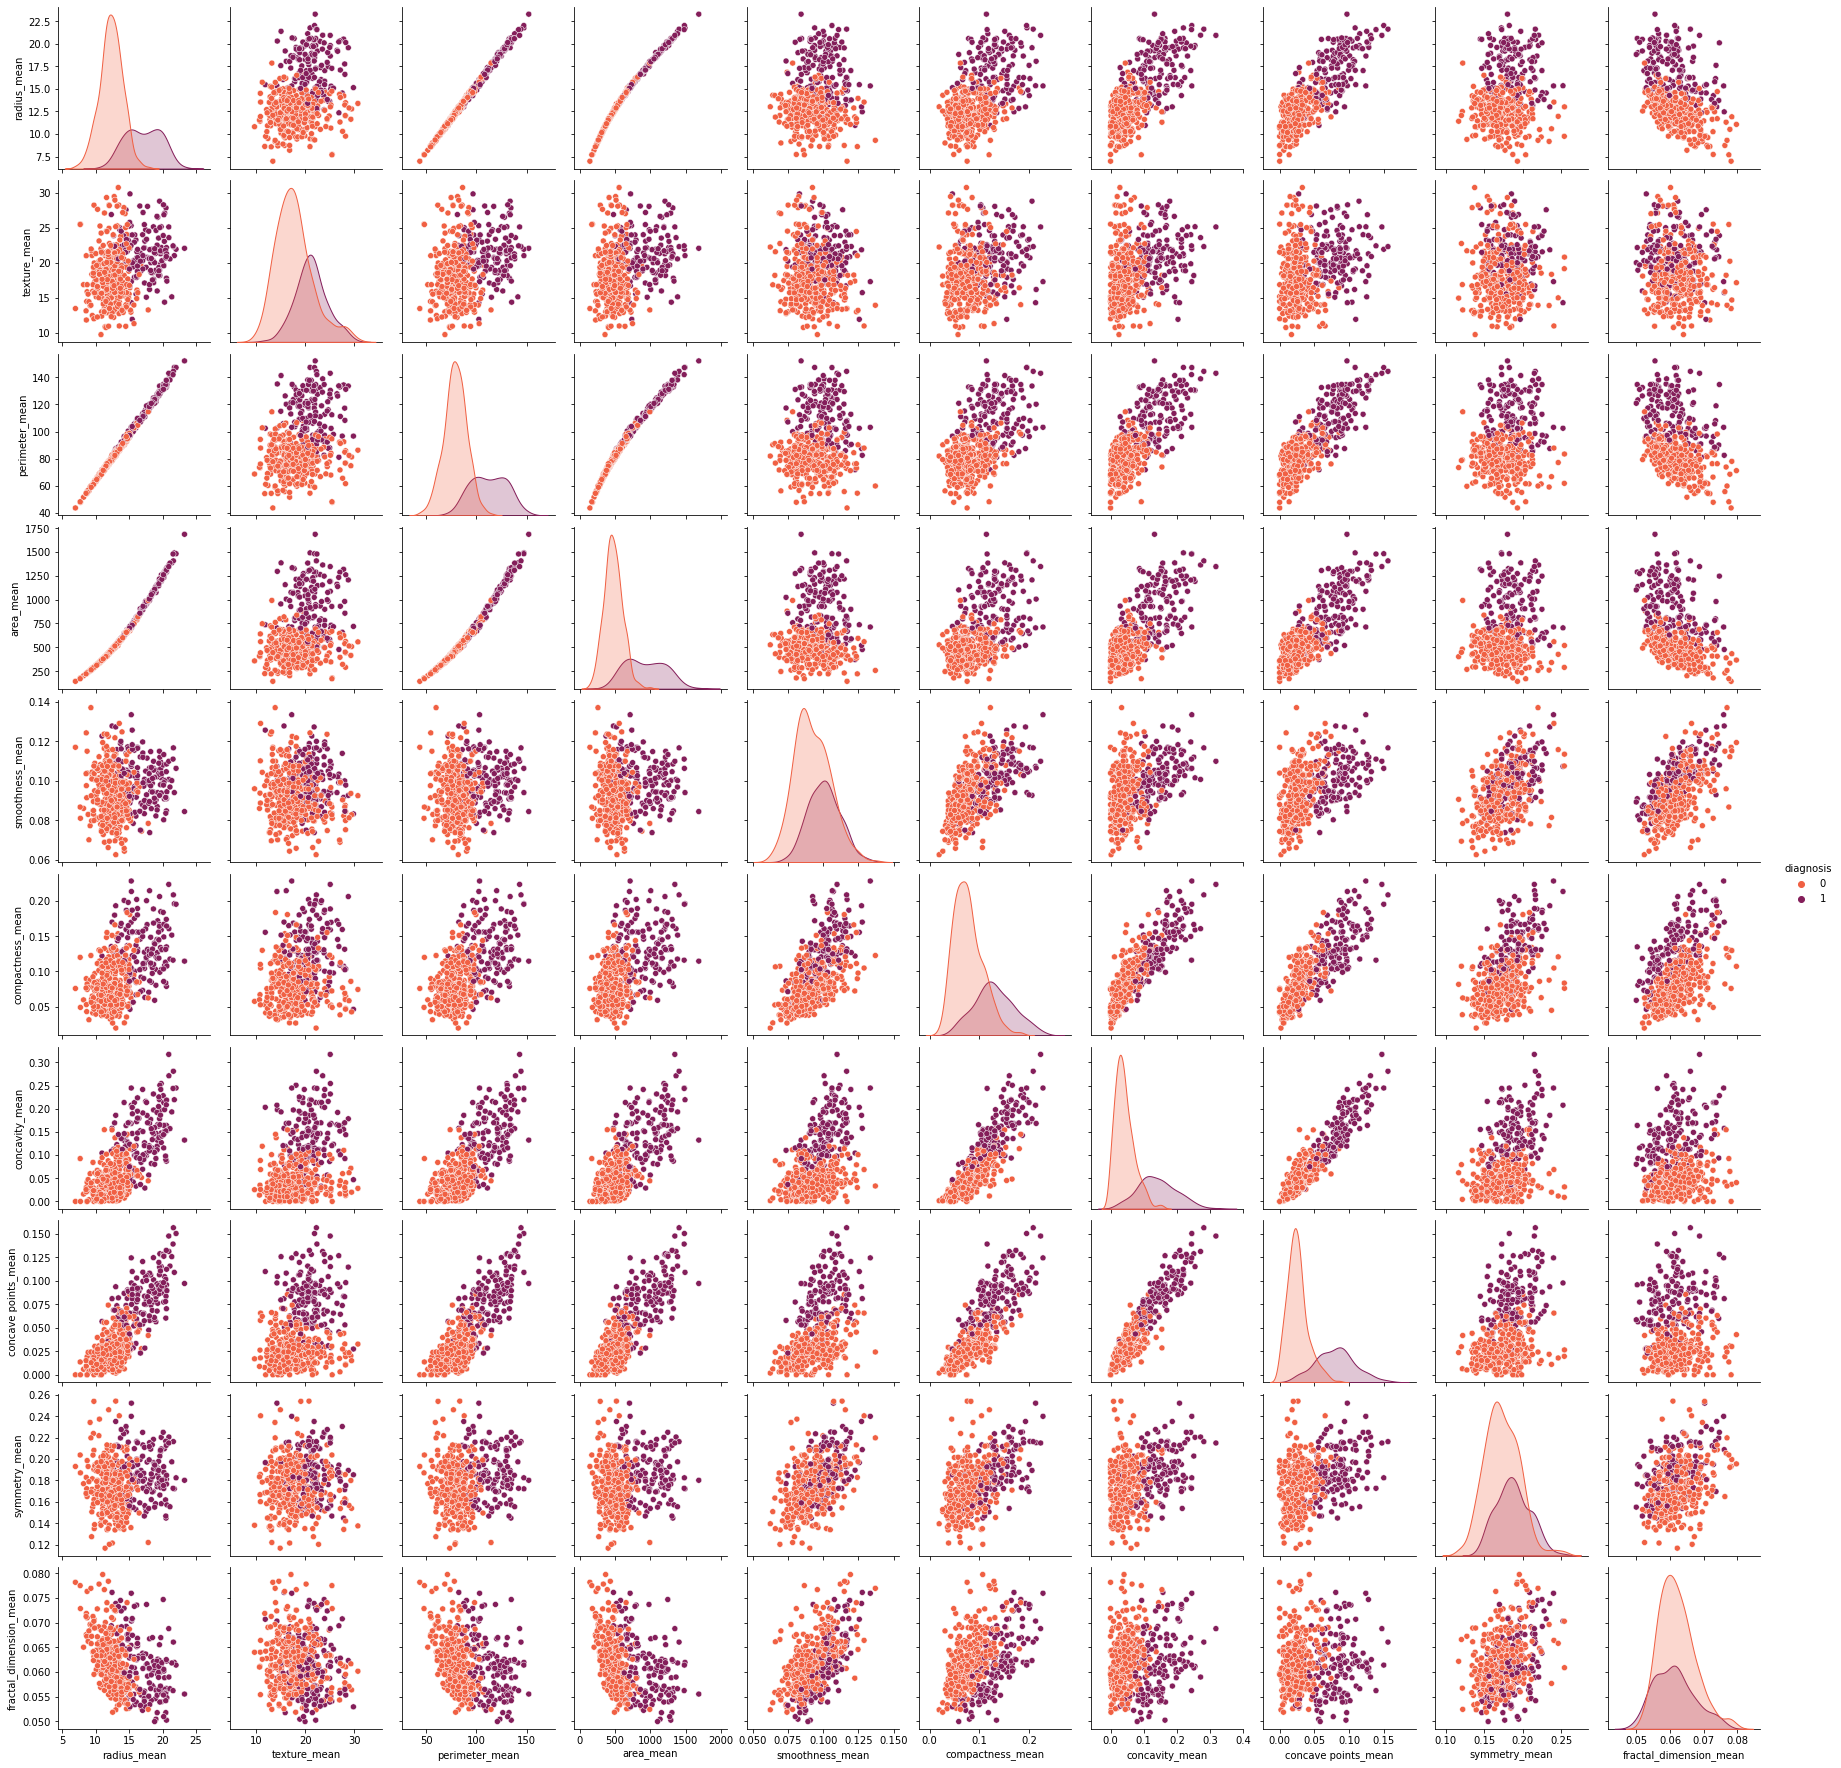

In [16]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=data[cols], hue='diagnosis', palette='rocket_r')

#### Splitting DataFrame

In [17]:
#splitting by random sampling
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

print(test)


     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
5            1        12.45         15.70           82.57      477.1   
8            1        13.00         21.82           87.50      519.8   
10           1        16.02         23.24          102.70      797.8   
..         ...          ...           ...             ...        ...   
551          0        11.13         22.44           71.49      378.4   
554          0        12.88         28.92           82.50      514.3   
563          1        20.92         25.09          143.00     1347.0   
564          1        21.56         22.39          142.00     1479.0   
566          1        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.08474           0.07864         0.08690  

## KNN Classification

In [18]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [19]:
#Apply KNN
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train, train["diagnosis"])
knnres =neigh.predict(test)
print (knnres)

[1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1]


In [20]:
#Calculate accuracy 
accuracy = accuracy_score(test["diagnosis"], knnres)
print (accuracy*100)

93.93939393939394


## Bayesian Classification

In [21]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np 


In [22]:
x = data.drop(["diagnosis"], axis = 1)
#split dataframe 
x_train, x_test, y_train, y_test = train_test_split(x, data["diagnosis"] ,test_size = 0.2 ,random_state = 0)


In [25]:
gnb = GaussianNB()
res = gnb.fit(x_train, y_train).predict(x_test)
print (res)
print(y_test.to_string())

[0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0]
109    0
299    0
331    0
509    1
394    0
20     0
369    1
552    0
189    0
183    0
284    0
295    0
449    1
337    1
205    1
383    0
531    0
412    0
184    1
47     1
245    0
425    0
283    1
131    1
55     0
499    1
28     1
426    0
117    1
276    0
447    0
142    0
149    0
228    0
433    1
418    0
363    0
513    0
410    0
281    0
377    0
56     1
463    0
263    1
93     0
2      1
253    1
466    0
479    1
125    0
422    0
204    0
494    0
171    1
159    0
17     1
382    0
207    1
267    0
398    0
95     1
324    0
475    0
486    0
353    1
234    0
15     1
464    0
317    1
92     0
169    0
80     0
525    0
387    0
209    0
421    0
309    0
123    0
554    0
344    0
350    0
278    0
490    0
261    1
384    0
381    0
482    0
187    0
405   

In [27]:
accuracy = accuracy_score(y_test , res)
print (accuracy*100)


94.94949494949495
